<a href="https://colab.research.google.com/github/cferley/DevOps-Bash-tools/blob/master/Cynthia_Ferley_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cynthia Ferley

Health Information Informatics Management

Texas State University

Build an Interactive Dashboard using Panel

December 11, 2025

Health Information Informatics Management student prepare for their career in healthcare data analytics and policy research by building interactive dashboards, which is an essential skill.

I chose this dataset because it was given as the data needed to create the dashboards. The dataset consist of medicare data and is critical for understanding US healthcare policy and spending. This aligns with my career goal of working in health policy research.


Some of the codes are similar, so I didn't make additional comments on those that were similar.

### Data Loading Notes

**Reproducibility**: To run this notebook on another machine:
1. Download the CSV file to your Downloads folder
2. Ensure the filename matches exactly: `Medicare Hospitals Geography Service 2013-2022.csv`
3. Run cells in order from top to bottom

**Alternative Approach**: For deployment, consider using `gdown` to automatically download from Google Drive or hosting the file on a public server.

In [ ]:
## Maintaining the version for reproducibility
!pip install -q panel==1.6.0 bokeh==3.6.3 matplotlib==3.10.0 pandas==2.2.2 numpy==2.0.2 jupyter_bokeh==4.0.5 gdown==5.2.0

In [ ]:
# =============================================================================
# DATA LOADING - GOOGLE COLAB WITH GOOGLE DRIVE
# =============================================================================

# Install gdown for downloading from Google Drive
!pip install gdown -q

import pandas as pd
import gdown

print("="*70)
print("LOADING MEDICARE DATASET")
print("="*70)

# YOUR Google Drive File ID
FILE_ID = '1RT1sP7cI_LGFAXz4zSVZ3ZubZSm19zjx'

# Construct download URL
url = f'https://drive.google.com/uc?id=1RT1sP7cI_LGFAXz4zSVZ3ZubZSm19zjx'

# Download the file
print("\nDownloading dataset from Google Drive...")
output = 'Medicare Hospitals Geography Service 2013-2022.csv'
gdown.download(url, output, quiet=False)

# Load the dataset
print("\nLoading data into pandas DataFrame...")
df = pd.read_csv(output)

# Display success message. Prints a line of equals signs
# "\n" = New Line (moves to next line)
# '*70' = Repeat it 70 times
# Result: Prints a horizontal line like this: ===============
print("\n" + "="*70)
print("DATASET LOADED SUCCESSFULLY")
print("="*70)

#'f"..."' = f-string (allows you to put variables inside the string)
#'"\n"' = New Line
# check mark = checkmark symbol (just decoration)
# '{len(df)}' = Counts the number of rows in your DataFrame
#':,' = Format with commas (so 278414 becomes 278,414)
print(f"\n✓ Records: {len(df):,}")

# Shows how many columns are in your dataset
#'df.shape' = Returns a tuple like '(278424, 10)' meaning (rows, columns)
#'df.shape[1]' = Gets the second number (columns) '10'
print(f"✓ Columns: {df.shape[1]}")

#Shows how much computer memory the dataset uses
#1. 'df.memory_usage(deep=True)' = Calculates memory for each column
#2. '.sum()' = Adds them all up (total bytes)
#3. '/1024**2' = Converts bytes to megabytes
# - '1024**2' means '1024 x 1024 = 1,048,576'
# - Dividing by this converts bytes MB
#4. ':.2f' = Format to 2 decimal places
# - Example: '33.456789' becomes '33.46'
print(f"✓ Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "="*70)

# Show first few rows
df.head()

LOADING MEDICARE DATASET



Downloading...
From: https://drive.google.com/uc?id=1RT1sP7cI_LGFAXz4zSVZ3ZubZSm19zjx
To: /content/Medicare Hospitals Geography Service 2013-2022.csv
100%|██████████| 34.0M/34.0M [00:00<00:00, 96.7MB/s]



Loading data into pandas DataFrame...

DATASET LOADED SUCCESSFULLY

✓ Records: 278,414
✓ Columns: 10
✓ Memory: 71.04 MB



,Year,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,2013,National,NaN,National,1,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...,1619,843946.20074,256885.023470,221367.292160
1,2013,National,NaN,National,2,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...,327,561456.54128,149336.743120,126796.966360
2,2013,National,NaN,National,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,17208,496163.80486,139258.315610,126641.090420
3,2013,National,NaN,National,4,TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...,18880,291574.20742,80951.137341,73741.837553
4,2013,National,NaN,National,5,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...,1010,472418.66733,123047.000000,101519.267330


In [ ]:
import pandas as pd
# Read Downloaded data
df = pd.read_csv("Medicare Hospitals Geography Service 2013-2022.csv")

# Convert TEXT columns to 'category' dtype
text_columns = [
    "Year",
    "Rndrng_Prvdr_Geo_Lvl",
    "Rndrng_Prvdr_Geo_Cd",
    "Rndrng_Prvdr_Geo_Desc",
    "DRG_Cd",
    "DRG_Desc"
]
df[text_columns] = df[text_columns].astype("category")

# Convert NUMERIC columns to 'float'
numeric_columns = [
    "Tot_Dschrgs",
    "Avg_Submtd_Cvrd_Chrg",
    "Avg_Tot_Pymt_Amt",
    "Avg_Mdcr_Pymt_Amt"
]
df[numeric_columns] = df[numeric_columns].astype("float")

In [ ]:
df.head()

,Year,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,2013,National,NaN,National,1,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...,1619.0,843946.20074,256885.023470,221367.292160
1,2013,National,NaN,National,2,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...,327.0,561456.54128,149336.743120,126796.966360
2,2013,National,NaN,National,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,17208.0,496163.80486,139258.315610,126641.090420
3,2013,National,NaN,National,4,TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...,18880.0,291574.20742,80951.137341,73741.837553
4,2013,National,NaN,National,5,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...,1010.0,472418.66733,123047.000000,101519.267330


In [ ]:
# Prints the table header (column names)
print("-"*200)
print(f"{'Columns':<22} |  Unique Values: Values")
print("-"*200)
for col in text_columns:
    unique_vals = sorted(df[col].unique())
# `f"..."` = f-string (formatted string)
#- `'Columns'` = The word "Columns"
#- `:<22` = Left-align and pad with spaces to make it 22 characters wide
#- `|` = Vertical bar separator
#- Rest is just text
    print(f"{col:<22} | ({len(unique_vals):>3} elements): {list(unique_vals)}")
print("-"*200)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Columns                |  Unique Values: Values
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Year                   | ( 10 elements): [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Rndrng_Prvdr_Geo_Lvl   | (  2 elements): ['National', 'State']
Rndrng_Prvdr_Geo_Cd    | ( 52 elements): [nan, 1.0, 2.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 53.0, 54.0, 55.0, 56.0]
Rndrng_Prvdr_Geo_Desc  | ( 52 elements)

The following Horizontal Bar Chart Analyzing the top DRGs (Diagnosis Related Groups) by discharge volume gives insight into the most frequently treated conditions or procedures across the Medicare system.

Matplotlib(Figure, height=400, sizing_mode='stretch_width', tight=True)
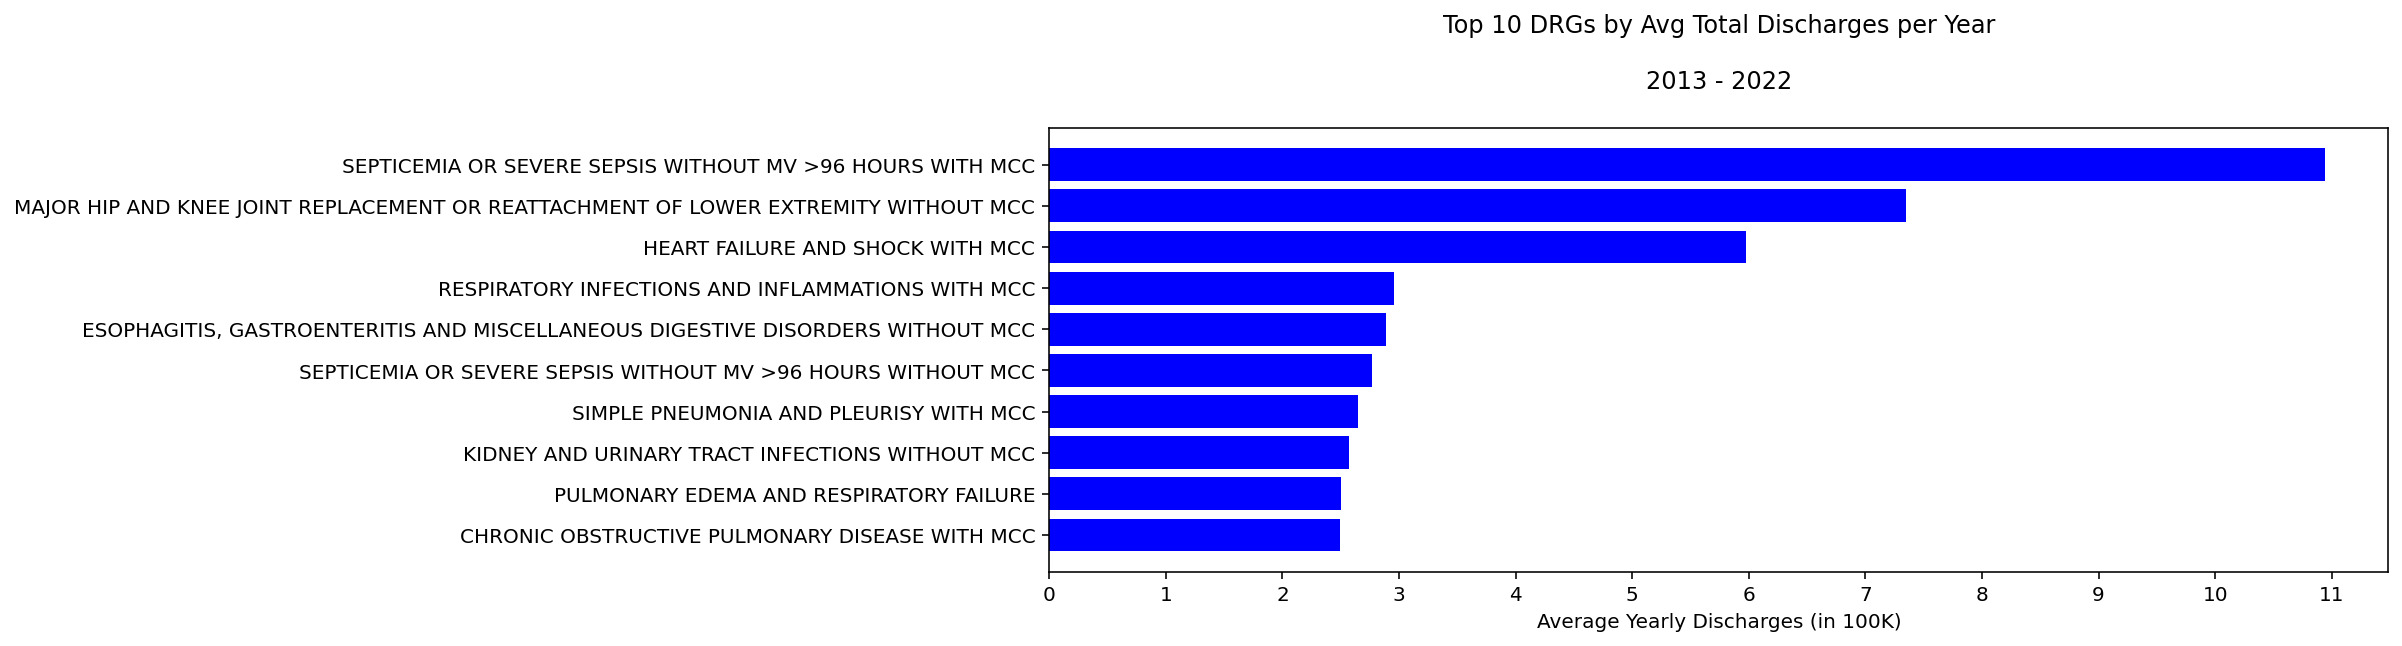

In [ ]:
import matplotlib.pyplot as plt
import panel as pn
import numpy as np

pn.extension()

def bar_top_drg_discharge(data, topn=10, figsize=(12, 4)):
    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    # Step 1: Group by 'DRG_Desc' and 'Year' and sum 'Tot_Dschrgs'
    yearly_sum = (
        data.groupby(['DRG_Desc', 'Year'], as_index=False, observed=False)['Tot_Dschrgs']
            .sum()
    )
    # data.groupby()
      # Takes your DataFrame and groups rows together based on certain columns
      # Think of it like sorting your data into buckets
    # ['DRG_Desc', 'Year']
      # These are the columns you're grouping by
      # Creates a separate group for each unique combination
    # as_index=False
      # Keeps DRG_Desc and Year as regular columns (not index)
      # Makes the result easier to work with
      # With as_index=False: You get a normal DataFrame
      # Without it: The grouping columns become the index (harder to use)
    # observed=False
      # Only relevant if you have categorical data types
      # False means "include all possible categories even if they have no data"
      # For your case, this probably doesn't matter much
   # ['Tot_Dschrgs']
     # After grouping, you select which column you want to work with
     # Here: you're only interested in the Tot_Dschrgs (Total Discharges) column
     # Ignores all other columns like payments, charges, etc.
   # .sum()
     # - For each group, **add up** all the discharge values
     # - This is the aggregation function
     # - Other options could be: `.mean()`, `.count()`, `.max()`, `.min()`

    # Step 2: Group by 'DRG_Desc' and compute the mean discharge count across years
    avg_drg = (
        yearly_sum.groupby('DRG_Desc', as_index=False, observed=False)['Tot_Dschrgs']
            .mean()
            .rename(columns={'Tot_Dschrgs': 'Avg_Tot_Dschrgs'})
            .sort_values('Avg_Tot_Dschrgs', ascending=False)
            .head(topn)
    )

    # Step 3: Extract years in ascending order
    years = sorted(data['Year'].unique())
    year_range = f"{years[0]} - {years[-1]}" if len(years) > 1 else str(years[0])

    # Step 4: Scale Avg_Tot_Dschrgs for readability (in 100Ks)
    avg_drg['Avg_Tot_Dschrgs_100k'] = avg_drg['Avg_Tot_Dschrgs'] / 100_000

    # Step 5: Plot
    ax.barh(avg_drg['DRG_Desc'], avg_drg['Avg_Tot_Dschrgs_100k'], color='blue')
    ax.set_title(f"Top {topn} DRGs by Avg Total Discharges per Year\n\n{year_range}\n")
    ax.set_xlabel("Average Yearly Discharges (in 100K)")
    ax.invert_yaxis()

    # Optional: Set more discrete ticks
    max_val = avg_drg['Avg_Tot_Dschrgs_100k'].max()
    ax.set_xticks(np.arange(0, max_val + 1, 1))

    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True, height=400, sizing_mode='stretch_width')


bar_top_drg_discharge(df)

This chart compares what hospitals charge versus what they actually receive for procedures. The comparison helps to evaluate cost inefficiencies or reimbursement gaps in Medicare services.

Matplotlib(Figure, height=400, sizing_mode='stretch_width', tight=True)
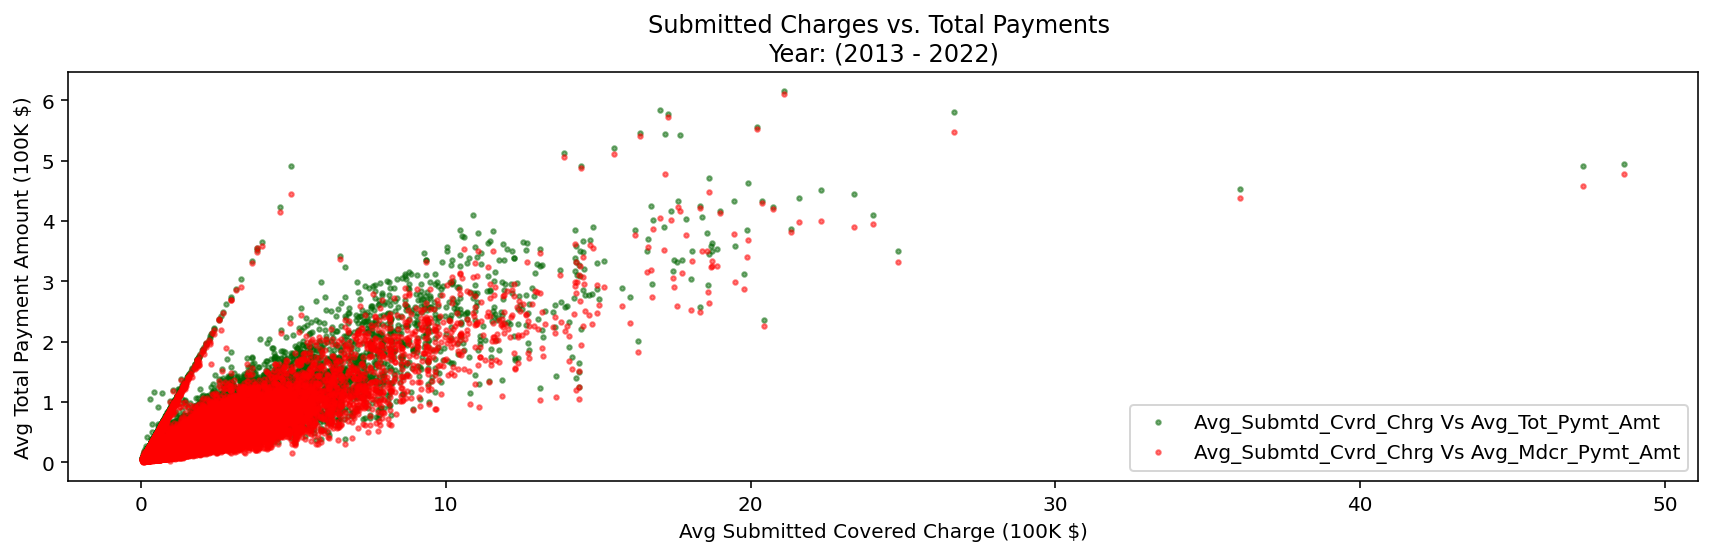

In [ ]:
def scatter_charges_vs_payments(data, figsize=(12, 4)):
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    ax.scatter(
        data['Avg_Submtd_Cvrd_Chrg']/100_000,
        data['Avg_Tot_Pymt_Amt']/100_000,
        alpha=0.5,
        color='darkgreen',
        label = "Avg_Submtd_Cvrd_Chrg Vs Avg_Tot_Pymt_Amt",
        s=5
    )

#ax.scatter()

  # Creates a scatter plot (dots showing individual data points)
  # Used to show relationships between two variables

  # data['Avg_Submtd_Cvrd_Chrg']/100_000, (X-axis)

  # Takes the "Average Submitted Covered Charge" column
  # Divides by 100,000 to convert dollars to "hundreds of thousands"
  # Example: $350,000 becomes 3.5
  # Why? Makes axis labels cleaner (easier to read "3.5" than "350,000")

  # data['Avg_Mdcr_Pymt_Amt']/100_000, (Y-axis)

  # Takes the "Average Medicare Payment Amount" column
  # Also divides by 100,000 for the same reason
  # Example: $120,000 becomes 1.2

# alpha=0.5,

  # Controls transparency of the dots
  # 0.0 = completely transparent (invisible)
  # 1.0 = completely opaque (solid)
  # 0.5 = 50% transparent
  # Why? When many dots overlap, transparency lets you see the density

# color='red',

  # Makes all dots blue
  # Could be any color: 'red', 'green', '#FF5733' (hex code), etc.

  # label="Avg_Submtd_Cvrd_Chrg Vs Avg_Mdcr_Pymt_Amt",

  # Text that appears in the legend
  # Describes what the dots represent

# s=5

  # Size of each dot
  # 5 is quite small (good for datasets with many points)
  # Larger numbers = bigger dots


    ax.scatter(
        data['Avg_Submtd_Cvrd_Chrg']/100_000,
        data['Avg_Mdcr_Pymt_Amt']/100_000,
        alpha=0.5,
        color='red',
        label="Avg_Submtd_Cvrd_Chrg Vs Avg_Mdcr_Pymt_Amt",
        s=5
    )

    years = sorted(data['Year'].unique())
    year_range = f"{years[0]} - {years[-1]}" if len(years) > 1 else str(years[0])

# ax.set_title(f"Submitted Charges vs. Total Payments \nYear: ({year_range})")
  # What it does: Sets the chart title
  # ax.set_title()` - Method to set the plot title
  # `f"..."` - f-string that allows variable insertion
  # `\n` - Creates a new line (title will be on two lines)
  # `{year_range}` - Inserts the year range variable

# ax.set_xlabel("Avg Submitted Covered Charge (100K $)")
  # What it does: Labels the X-axis (horizontal axis)
  # Tells users what the X-axis represents
  # "(100K $)" indicates values are in units of $100,000
  # So if you see "5" on the axis, it means $500,000

# ax.set_ylabel("Avg Total Payment Amount (100K $)")
  # What it does: Labels the Y-axis (vertical axis)
  # Tells users what the Y-axis represents
  # Same scaling as X-axis (100K units)

# plt.tight_layout()
  # What it does: Automatically adjusts plot spacing
  # Prevents labels from being cut off
  # Ensures title, axis labels, and plot don't overlap
  # Makes the plot look cleaner and more professional
  # Without it: Labels might be cut off at edges
  # With it: Everything fits nicely in the figure

# plt.legend(loc='lower right')
  # What it does: Adds a legend to the plot
  # Parameters:
  # loc='lower right' - Places legend in the lower right corner of the plot
  # Purpose: If you have multiple data series (different colors/markers), the legend shows what each represents

# plt.close(fig)
  # What it does: Closes the figure to free up memory
  # Why this matters:
  # Prevents matplotlib from displaying the plot multiple times
  # Frees up computer memory (important when creating many plots)
  # In Panel/Jupyter, you return the figure object instead of displaying directly
  # Without this: You might see duplicate plots in your notebook

# return pn.pane.Matplotlib(fig, tight=True, height=400, sizing_mode='stretch_width')
  # What it does: Wraps the matplotlib figure in a Panel pane and returns it
  # pn.pane.Matplotlib() - Panel's wrapper for matplotlib figures
  # fig - The matplotlib figure object we created
  # tight=True - Applies tight layout (similar to plt.tight_layout())
  # height=400 - Sets plot height to 400 pixels
  # sizing_mode='stretch_width' - Makes plot width responsive (stretches to fill available width)
  # Purpose: Converts matplotlib plot into a Panel-compatible object that can be displayed in the dashboard

# scatter_charges_vs_payments(df)
  # What it does: Calls/executes the function with your DataFrame
  # scatter_charges_vs_payments - The function name
  # df - Your DataFrame being passed as the data parameter
  # () - Executes the function

# Result: Displays the scatter plot in your notebook or dashboard

    ax.set_title(f"Submitted Charges vs. Total Payments \nYear: ({year_range})")
    ax.set_xlabel("Avg Submitted Covered Charge (100K $)")
    ax.set_ylabel("Avg Total Payment Amount (100K $)")
    plt.tight_layout()
    plt.legend(loc='lower right')
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True, height=400, sizing_mode='stretch_width')

scatter_charges_vs_payments(df)

This visualization breaks down inpatient volume by state, helping identify geographic trends in hospital utilization and patient flow.

Matplotlib(Figure, height=400, sizing_mode='stretch_width', tight=True)
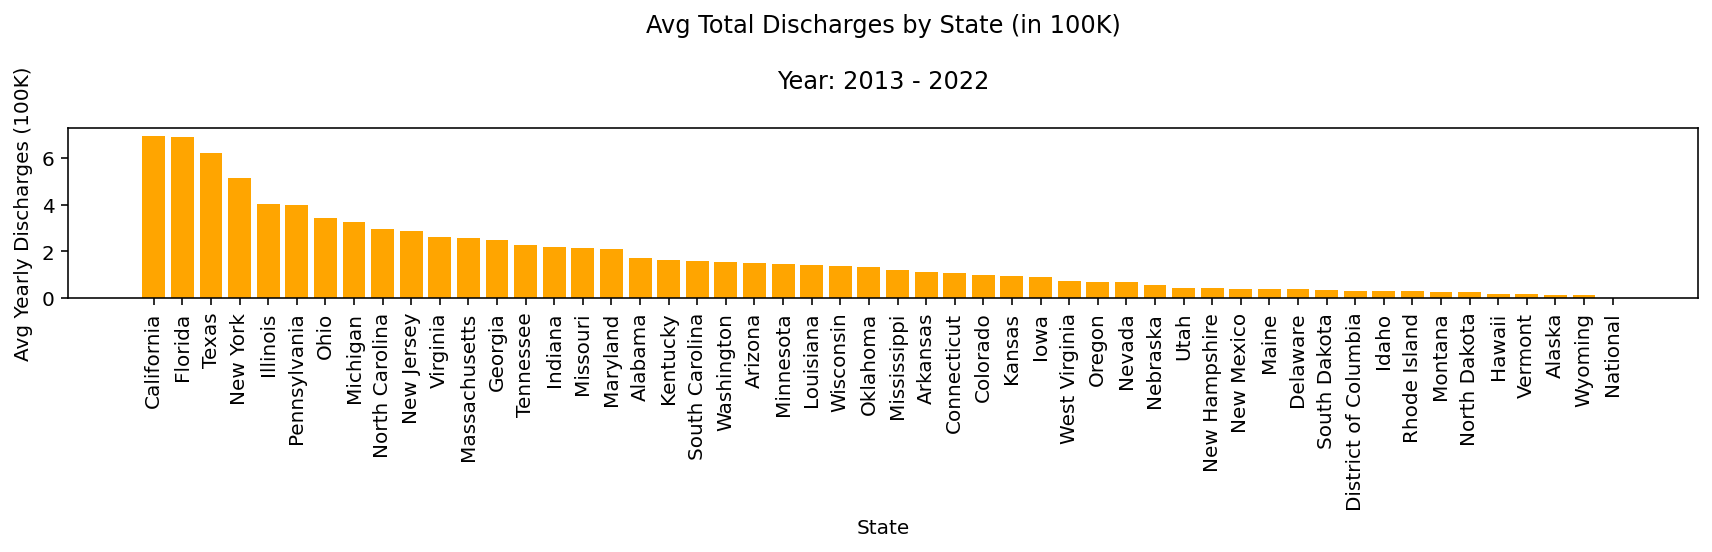

In [ ]:
def bar_discharges_by_state(data, figsize=(12, 4)):

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    # Filter only State-level data
    state_data = data[data['Rndrng_Prvdr_Geo_Lvl'] == 'State']

    # Step 1: Group by State and Year and sum discharges
    yearly_sum = (
        state_data.groupby(['Rndrng_Prvdr_Geo_Desc', 'Year'], as_index=False, observed=False)['Tot_Dschrgs']
        .sum()
    )

    # Step 2: Group by State only and take the mean
    mean_by_state = (
        yearly_sum.groupby('Rndrng_Prvdr_Geo_Desc', as_index=False, observed=False)['Tot_Dschrgs']
        .mean()
        .rename(columns={'Tot_Dschrgs': 'Avg_Tot_Dschrgs'})
        .sort_values('Avg_Tot_Dschrgs', ascending=False)
    )

    # Scale to 100K
    mean_by_state['Avg_Tot_Dschrgs_100k'] = mean_by_state['Avg_Tot_Dschrgs'] / 100_000

    # Extract year range
    years = sorted(data['Year'].unique())
    year_range = f"{years[0]} - {years[-1]}" if len(years) > 1 else str(years[0])

    # Plot
    ax.bar(mean_by_state['Rndrng_Prvdr_Geo_Desc'], mean_by_state['Avg_Tot_Dschrgs_100k'], color='orange')
    ax.set_title(f"Avg Total Discharges by State (in 100K)\n\nYear: {year_range}\n")
    ax.set_ylabel("Avg Yearly Discharges (100K)")
    ax.set_xlabel("State")
    ax.set_xticks(np.arange(len(mean_by_state['Rndrng_Prvdr_Geo_Desc'])))
    ax.set_xticklabels(mean_by_state['Rndrng_Prvdr_Geo_Desc'], rotation=90)

    plt.tight_layout()
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True, height=400, sizing_mode='stretch_width')


bar_discharges_by_state(df)

This chart shows how the overall volume of Medicare inpatient discharges has changed year to year, revealing system-wide growth or decline trends.

Matplotlib(Figure, height=400, sizing_mode='stretch_width', tight=True)
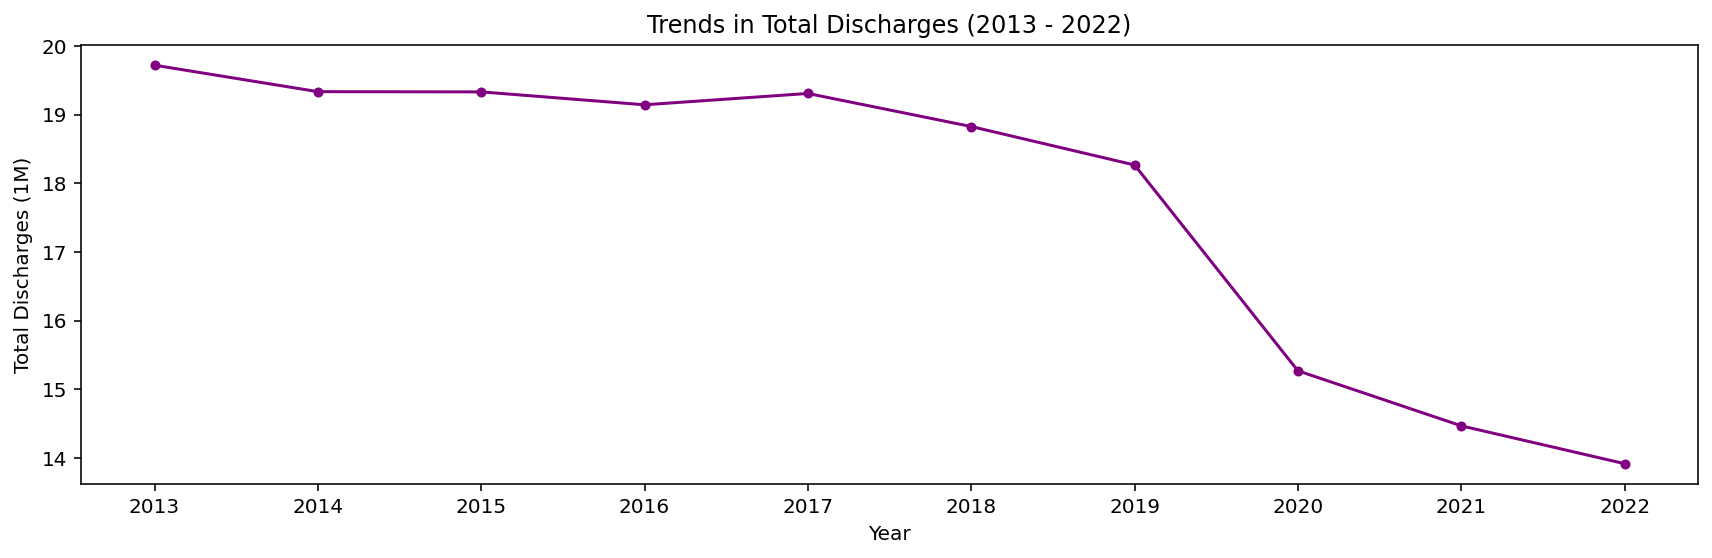

In [ ]:
def line_total_discharges_over_time(data, figsize=(12, 4)):

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    # Group and compute yearly total discharges
    yearly_totals = data.groupby('Year', observed=False, as_index=False)['Tot_Dschrgs'].sum()

    # Plot line chart
    ax.plot(
        yearly_totals['Year'],
        yearly_totals['Tot_Dschrgs']/1000_000,
        marker='o',
        color='purple',
        markersize=4
    )

    # Extract year range
    years = sorted(data['Year'].unique())
    year_range = f"{years[0]} - {years[-1]}" if len(years) > 1 else str(years[0])

    # Title and labels
    ax.set_title(f"Trends in Total Discharges ({year_range})")
    ax.set_xlabel("Year")
    ax.set_ylabel("Total Discharges (1M)")

    # ✅ Ensure every year is shown on x-axis
    all_years = sorted(data['Year'].unique())
    ax.set_xticks(all_years)

    plt.tight_layout()
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True, height=400, sizing_mode='stretch_width')


line_total_discharges_over_time(df)

This plot captures how Medicare reimbursement amounts have evolved, providing insight into policy or pricing changes across the years.

Matplotlib(Figure, height=400, sizing_mode='stretch_width', tight=True)
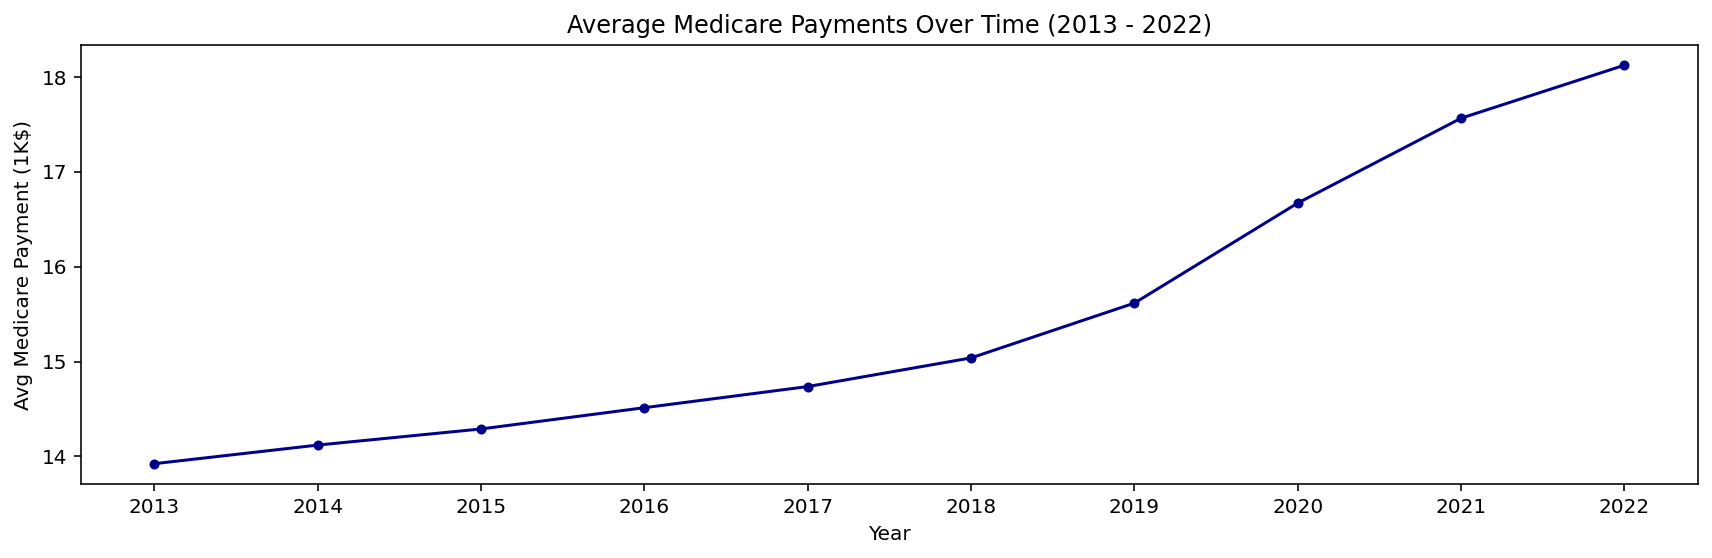

In [ ]:
def line_avg_medicare_payments_over_time(data, figsize=(12, 4)):

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    yearly_avg = data.groupby('Year', observed=False, as_index=False)['Avg_Mdcr_Pymt_Amt'].mean()

    ax.plot(
        yearly_avg['Year'],
        yearly_avg['Avg_Mdcr_Pymt_Amt']/1000,
        marker='o',
        color='darkblue',
        markersize=4
    )
    # Extract year range
    years = sorted(data['Year'].unique())
    year_range = f"{years[0]} - {years[-1]}" if len(years) > 1 else str(years[0])

    ax.set_title(f"Average Medicare Payments Over Time ({year_range})")
    ax.set_xlabel("Year")
    ax.set_ylabel("Avg Medicare Payment (1K$)")

    # ✅ Ensure every year is shown on x-axis
    all_years = sorted(data['Year'].unique())
    ax.set_xticks(all_years)

    plt.tight_layout()
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True, height=400, sizing_mode='stretch_width')


line_avg_medicare_payments_over_time(df)

This visualization highlights how the average submitted covered charges for the most expensive Diagnosis-Related Groups (DRGs) have changed over time. It helps uncover trends in hospital billing practices, inflationary effects, or shifts in treatment intensity for major procedures.

Matplotlib(Figure, height=500, sizing_mode='stretch_width', tight=True)
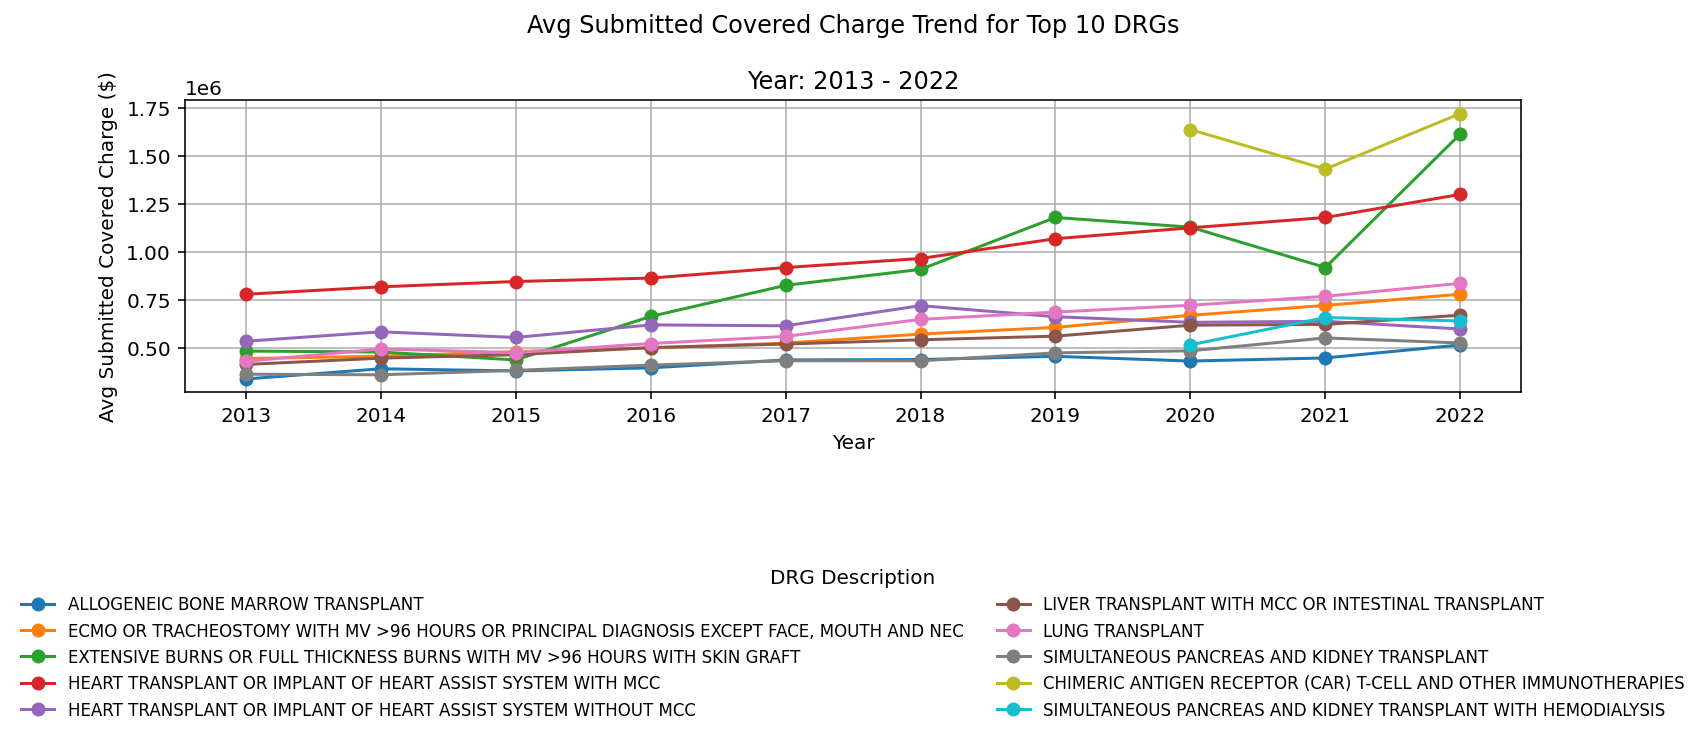

In [ ]:
def line_avg_charge_by_drg_over_years(data, top_n=10, figsize=(12, 6)):
    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    # Step 1: Compute mean charges by DRG_Desc
    mean_by_drg = (
        data.groupby('DRG_Desc', as_index=False, observed=False)['Avg_Submtd_Cvrd_Chrg']
        .mean()
        .sort_values('Avg_Submtd_Cvrd_Chrg', ascending=False)
    )

    # Step 2: Select top N DRG descriptions
    top_drg_descs = mean_by_drg['DRG_Desc'].head(top_n).tolist()

    # Step 3: Filter original data
    filtered_data = data[data['DRG_Desc'].isin(top_drg_descs)]

    # Step 4: Group by Year and DRG_Desc
    grouped = (
        filtered_data.groupby(['Year', 'DRG_Desc'], as_index=False, observed=False)['Avg_Submtd_Cvrd_Chrg']
        .mean()
    )
    grouped.dropna(inplace=True)

    # Step 5: Pivot table for plotting
    pivot = grouped.pivot(index='Year', columns='DRG_Desc', values='Avg_Submtd_Cvrd_Chrg')

    # Step 6: Plot each DRG_Desc as a line
    for col in pivot.columns:
        ax.plot(pivot.index, pivot[col], marker='o', label=col)

    # Ensure all years are shown on x-axis
    all_years = sorted(data['Year'].dropna().unique())
    ax.set_xticks(all_years)
    ax.set_xticklabels(all_years, rotation=0)

    # Legend at bottom in multiple rows
    n_items = len(pivot.columns)
    ncol = min(n_items, 2)  # You can adjust per your layout

    ax.legend(
        title="\n\n\n\nDRG Description",
        fontsize='small',
        title_fontsize='medium',
        loc='upper center',
        bbox_to_anchor=(0.5, -0.25),
        ncol=ncol,
        frameon=False
    )

    # Year range in title
    year_range = f"{all_years[0]} - {all_years[-1]}" if len(all_years) > 1 else str(all_years[0])
    ax.set_title(f"Avg Submitted Covered Charge Trend for Top {top_n} DRGs\n\nYear: {year_range}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Avg Submitted Covered Charge ($)")
    ax.grid(True)

    plt.tight_layout()
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True, height=500, sizing_mode='stretch_width')

line_avg_charge_by_drg_over_years(df)

In [ ]:
df.head()

,Year,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,2013,National,NaN,National,1,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...,1619.0,843946.20074,256885.023470,221367.292160
1,2013,National,NaN,National,2,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...,327.0,561456.54128,149336.743120,126796.966360
2,2013,National,NaN,National,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,17208.0,496163.80486,139258.315610,126641.090420
3,2013,National,NaN,National,4,TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...,18880.0,291574.20742,80951.137341,73741.837553
4,2013,National,NaN,National,5,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...,1010.0,472418.66733,123047.000000,101519.267330


Row
    [0] Column
        [0] Toggle(name='✖', value=True, width=50)
        [1] Column(sizing_mode='fixed', width=300)
            [0] Markdown(str)
            [1] Divider()
            [2] RangeSlider(end=2022, name='Year Range', sizing_mode='stretch_width', start=2013, step=1, value=(2013, 2022), value_end=2022, value_start=2013)
            [3] Divider()
            [4] MultiChoice(name='Geo Level(s)', options=['National', 'State'], sizing_mode='stretch_width')
            [5] MultiChoice(name='Geo Code(s)', options=[1.0, 2.0, 4.0, ...], sizing_mode='stretch_width')
            [6] MultiChoice(name='Geo Description(s)', options=['Alabama', 'Alaska', ...], sizing_mode='stretch_width')
            [7] Divider()
            [8] MultiChoice(name='DRG Description(s)', options=['ABORTION WITH D&C, ...], sizing_mode='stretch_width')
            [9] Divider()
            [10] RangeSlider(end=623755, name='Total Discharges', sizing_mode='stretch_width', start=11, step=1, value=(11, 623755), value_end=623755, value_start=11)
            [11] RangeSlider(end=4866019.6667, name='Avg Submitted C..., sizing_mode='stretch_width', start=4487.0833333, step=100.0, value=(4487.0833333, ..., value_end=4866019.6667, value_start=4487.0833333)
            [12] RangeSlider(end=616026.36364, name='Avg Total Payment A..., sizing_mode='stretch_width', start=1408.0, step=100.0, value=(1408.0, 616026.36364), value_end=616026.36364, value_start=1408.0)
            [13] RangeSlider(end=610619.90909, name='Avg Medicare P..., sizing_mode='stretch_width', step=100.0, value=(0.0, 610619.90909), value_end=610619.90909)
            [14] Divider()
            [15] Button(button_type='primary', name='Apply filters to begin.', sizing_mode='stretch_width')
    [1] ParamFunction(function, _pane=Column, defer_load=False, height=800, sizing_mode='stretch_width')
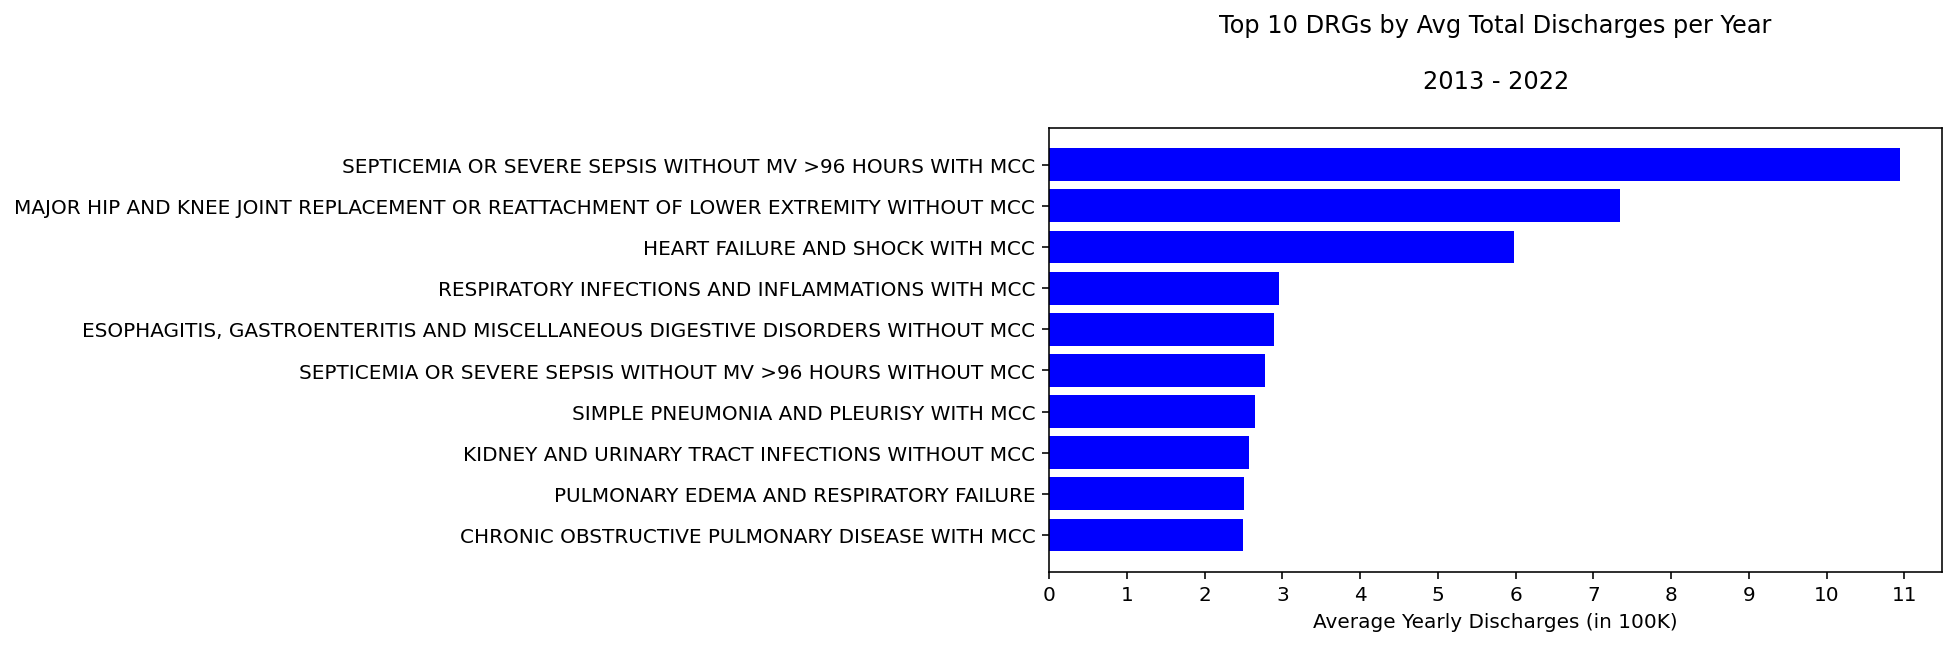
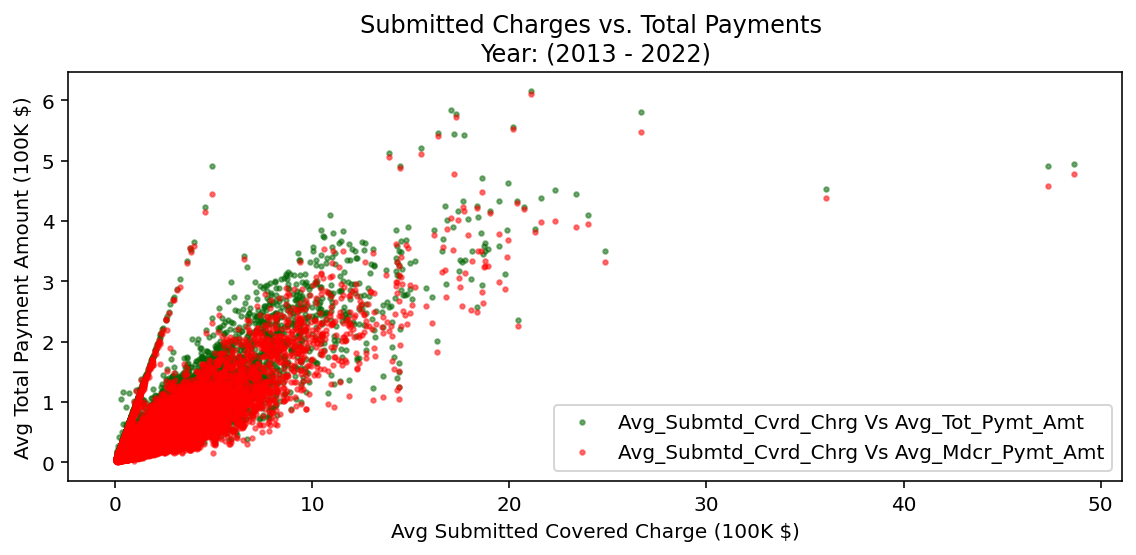
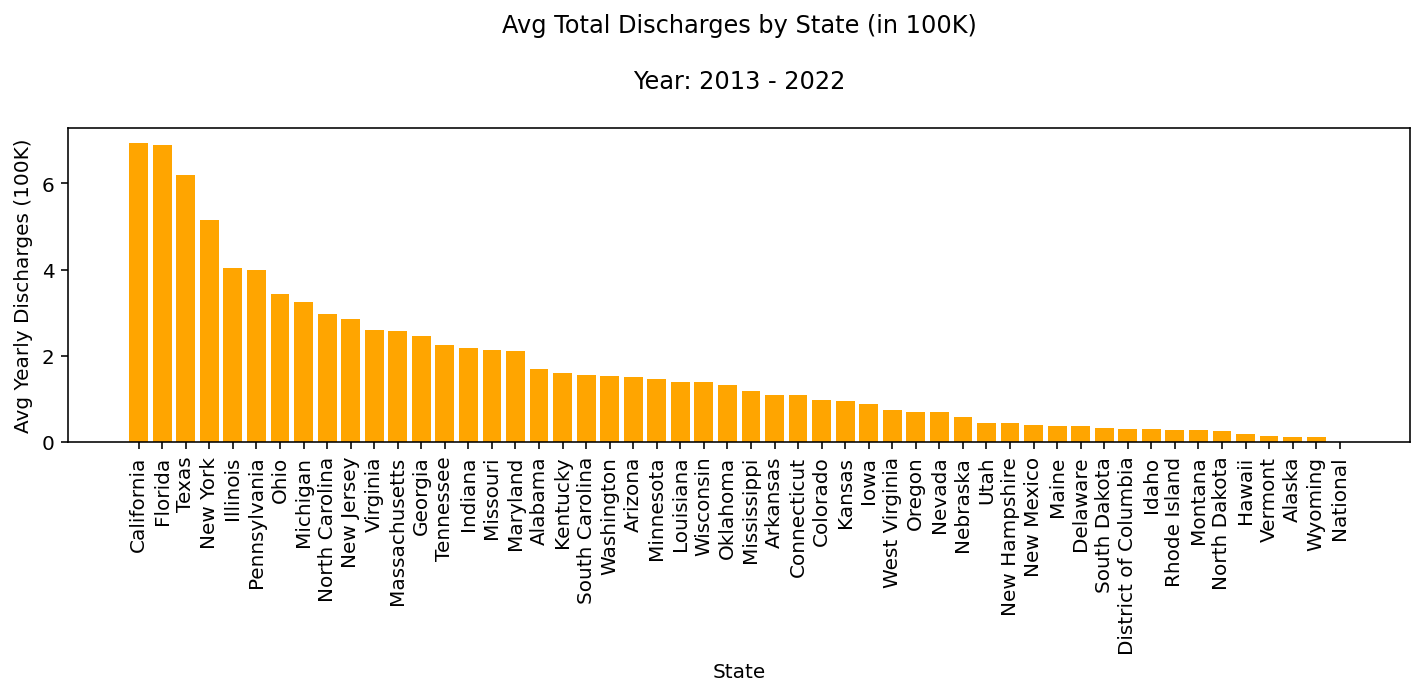
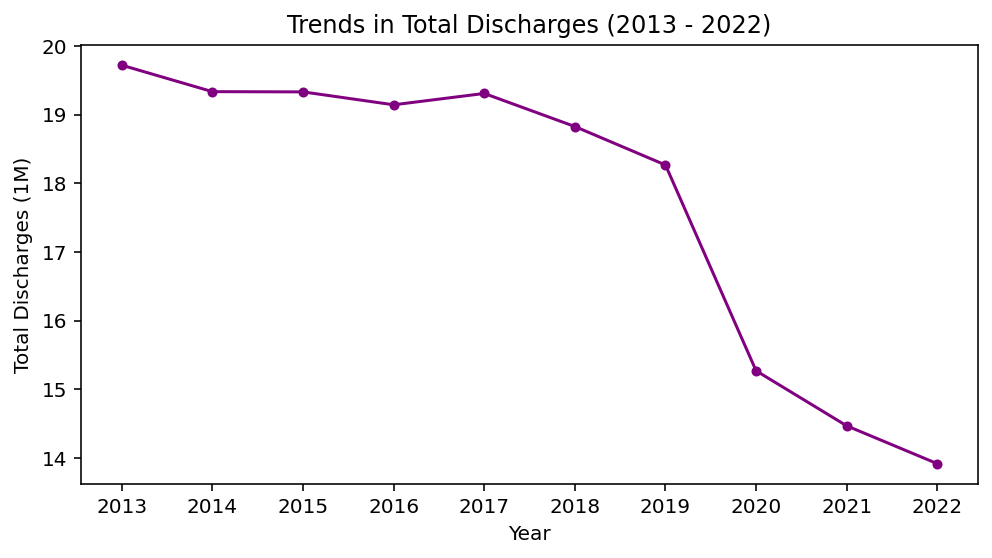
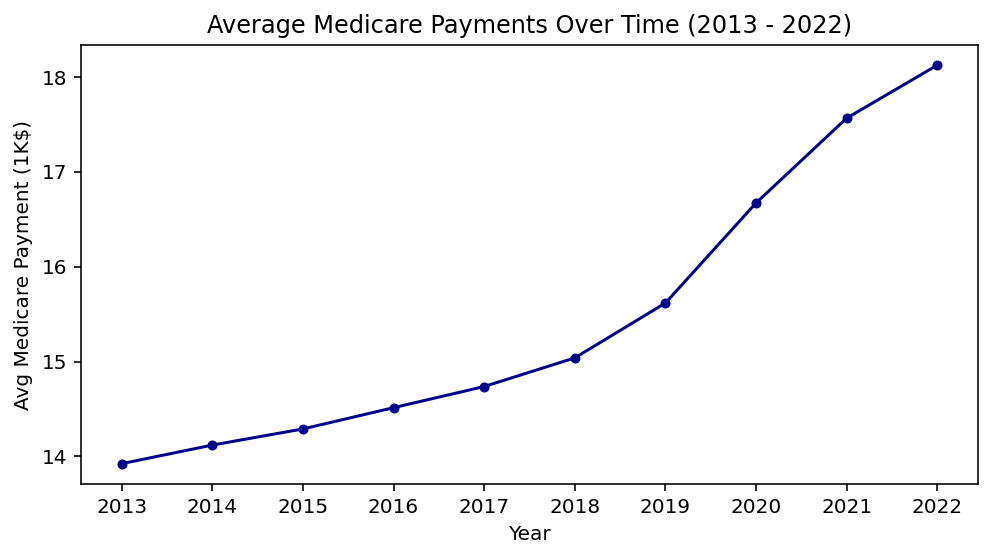
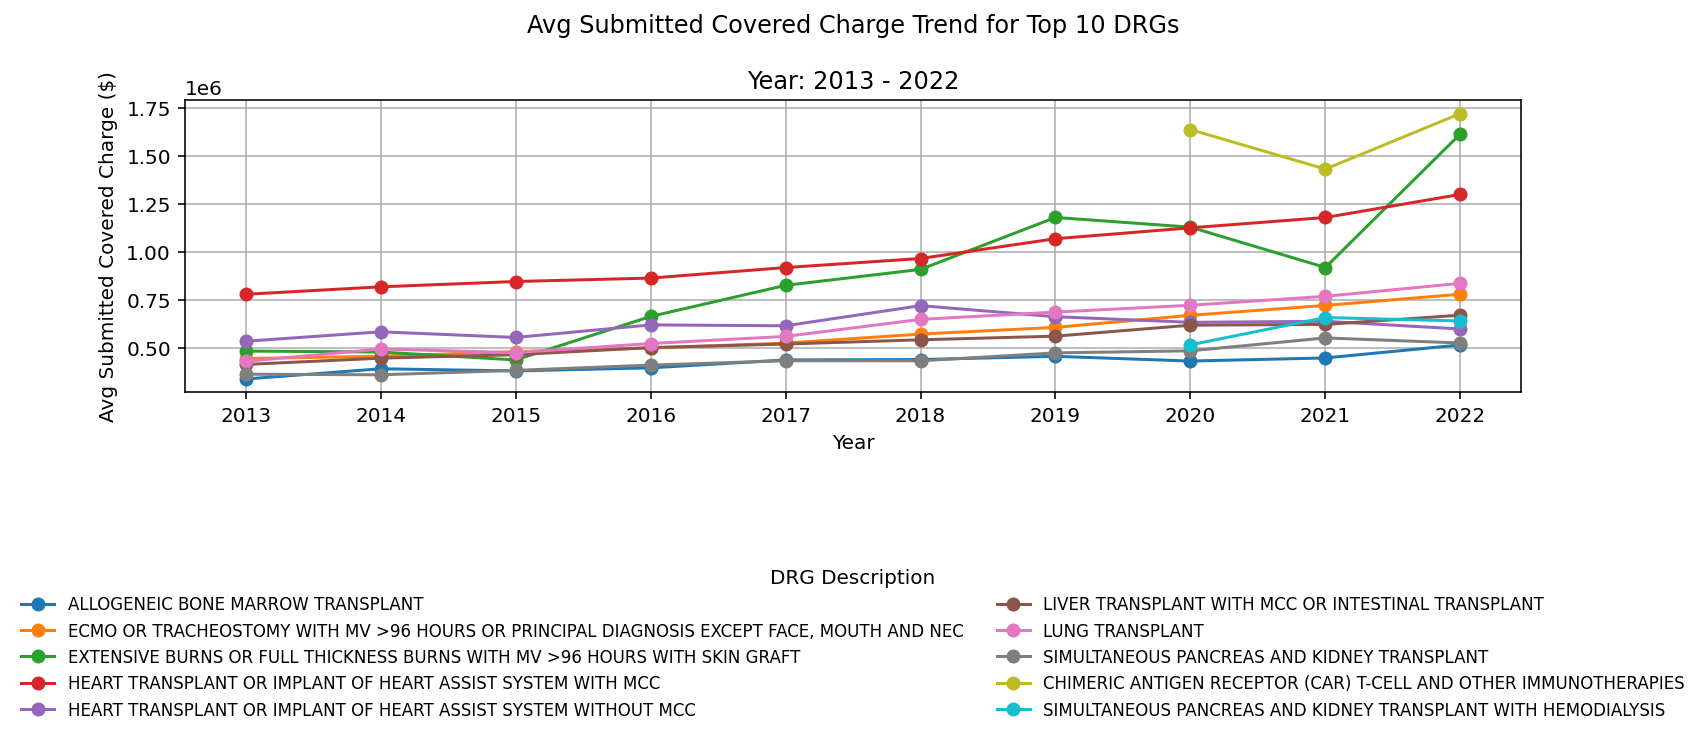

In [ ]:
import param
import panel as pn
pn.extension()

"""
1. Setting Up the Data:
   - `source_df` is a copy of the original dataset to prevent unintended modifications.
   - `target_df` is a `param.Parameterized` object that holds the filtered data and triggers reactive updates.
"""

# Define Data or Input to our dashboard
source_df = df.copy() # This is a copy of original df, .copy because we do not want to mess up with original df

class DataStore(param.Parameterized):
    data = param.DataFrame(df.copy())

target_df = DataStore() # This is a copy of source_df, we will monitor this dataframe to update the plot


"""
2. Defining Figure Dimensions:
   - `FIGSIZE` defines the size of the figures used in plots.
   - `SIDEBAR_WIDTH` defines the fixed width of the control panel (sidebar).
"""
## Adjusting Fig-Size, adjust this based on your requirements, default is (6, 4)
FIGSIZE = (16, 4)
SIDEBAR_WIDTH = 300


"""
3. Defining Controls (Widgets):
   - `IntSlider` for selecting a specific year from the dataset.
   - `MultiChoice` for filtering based on values in columns like Geo Level, Geo Code, State, and DRG Description.
   - `RangeSlider` for selecting numeric value ranges such as discharges and payment amounts.
   - `Button` to apply all filters and trigger dashboard updates.
"""

import panel as pn
pn.extension()

# =============================
# RangeSlider for selecting a year range
# =============================
# Select a range of years to filter records — uses minimum and maximum values from the dataset.
year_slider = pn.widgets.RangeSlider(
    name='Year Range',
    start=source_df['Year'].astype(int).min(),
    end=source_df['Year'].astype(int).max(),
    value=(
        source_df['Year'].astype(int).min(),
        source_df['Year'].astype(int).max()
    ),
    step=1,
    sizing_mode='stretch_width'
)

# =============================
# MultiChoice for selecting Geographic Level
# =============================
# Choose one or more geographic aggregation levels (e.g., State or National).
geo_lvl_choice = pn.widgets.MultiChoice(
    name='Geo Level(s)',
    options=sorted(source_df['Rndrng_Prvdr_Geo_Lvl'].dropna().unique().tolist()),
    value=[],
    sizing_mode='stretch_width'
)

# =============================
# MultiChoice for selecting Geographic Code
# =============================
# Choose one or more FIPS state codes to filter records at the state level.
geo_cd_choice = pn.widgets.MultiChoice(
    name='Geo Code(s)',
    options=sorted(source_df['Rndrng_Prvdr_Geo_Cd'].dropna().unique().tolist()),
    value=[],
    sizing_mode='stretch_width'
)

# =============================
# MultiChoice for selecting Geographic Description (State Name)
# =============================
# Select specific states for geographic filtering (e.g., Texas, California).
geo_desc_choice = pn.widgets.MultiChoice(
    name='Geo Description(s)',
    options=sorted(source_df['Rndrng_Prvdr_Geo_Desc'].dropna().unique().tolist()),
    value=[],
    sizing_mode='stretch_width'
)

# =============================
# MultiChoice for selecting DRG Descriptions
# =============================
# Select specific Diagnosis Related Groups (DRGs) based on their descriptions.
drg_desc_choice = pn.widgets.MultiChoice(
    name='DRG Description(s)',
    options=sorted(source_df['DRG_Desc'].dropna().unique().tolist()),
    value=[],
    sizing_mode='stretch_width'
)

# =============================
# RangeSlider for filtering by Total Discharges
# =============================
# Set a range for filtering the total number of discharges.
tot_discharges_slider = pn.widgets.RangeSlider(
    name='Total Discharges',
    start=int(source_df['Tot_Dschrgs'].min()),
    end=int(source_df['Tot_Dschrgs'].max()),
    value=(int(source_df['Tot_Dschrgs'].min()), int(source_df['Tot_Dschrgs'].max())),
    sizing_mode='stretch_width'
)

# =============================
# RangeSlider for filtering by Avg Submitted Covered Charge
# =============================
# Set a charge range for procedures — typically the amount submitted by hospitals.
covered_charge_slider = pn.widgets.RangeSlider(
    name='Avg Submitted Covered Charge',
    start=float(source_df['Avg_Submtd_Cvrd_Chrg'].min()),
    end=float(source_df['Avg_Submtd_Cvrd_Chrg'].max()),
    value=(float(source_df['Avg_Submtd_Cvrd_Chrg'].min()), float(source_df['Avg_Submtd_Cvrd_Chrg'].max())),
    step=100.0,
    sizing_mode='stretch_width'
)

# =============================
# RangeSlider for filtering by Avg Total Payment Amount
# =============================
# Set a range for total payments received by hospitals (includes Medicare + patient + third parties).
total_payment_slider = pn.widgets.RangeSlider(
    name='Avg Total Payment Amount',
    start=float(source_df['Avg_Tot_Pymt_Amt'].min()),
    end=float(source_df['Avg_Tot_Pymt_Amt'].max()),
    value=(float(source_df['Avg_Tot_Pymt_Amt'].min()), float(source_df['Avg_Tot_Pymt_Amt'].max())),
    step=100.0,
    sizing_mode='stretch_width'
)

# =============================
# RangeSlider for filtering by Avg Medicare Payment Amount
# =============================
# Set a range for average Medicare payments (excluding patient payments).
medicare_payment_slider = pn.widgets.RangeSlider(
    name='Avg Medicare Payment Amount',
    start=float(source_df['Avg_Mdcr_Pymt_Amt'].min()),
    end=float(source_df['Avg_Mdcr_Pymt_Amt'].max()),
    value=(float(source_df['Avg_Mdcr_Pymt_Amt'].min()), float(source_df['Avg_Mdcr_Pymt_Amt'].max())),
    step=100.0,
    sizing_mode='stretch_width'
)

# =============================
# Button to apply filter selections
# =============================
# Apply all selected filters and refresh visualizations or data views.
update_button = pn.widgets.Button(
    name='Apply filters to begin.',
    button_type='primary',
    sizing_mode='stretch_width',
    disabled=False
)

"""
4. Linking Controls to Action Button Status:
   - A `@param.depends(..., watch=True)` function called `prompt_update` detects changes in any widget.
   - This function enables the button, updates its label to prompt user action, and changes its appearance.

"""
@param.depends(year_slider,
               geo_lvl_choice,
               geo_cd_choice,
               geo_desc_choice,
               drg_desc_choice,
               tot_discharges_slider,
               covered_charge_slider,
               total_payment_slider,
               medicare_payment_slider,
               watch=True)
def prompt_update(*args, **kwargs):
    """ Updates the button label when a control is modified """
    update_button.name = "Click to 'Update Plot' !!"  # Reset button text
    update_button.button_type = "danger"
    update_button.disabled = False


"""
5. Updating the DataFrame Based on Button Click:
   - `update_df()` is called when the button is clicked.
   - It applies filters from all widgets to `source_df`, then updates `target_df.data`.
   - After updating, the button is reset to its default disabled state with its label and style.
"""

def update_df(event=None):
    # Start with the full dataset
    filtered_df = source_df.copy()

    # Apply Year Filter
    selected_year_min, selected_year_max = year_slider.value
    filtered_df = filtered_df[filtered_df['Year'].astype(int).between(selected_year_min, selected_year_max)]

    # Apply Geo Level Filter
    if geo_lvl_choice.value:
        filtered_df = filtered_df[filtered_df['Rndrng_Prvdr_Geo_Lvl'].isin(geo_lvl_choice.value)]

    # Apply Geo Code Filter
    if geo_cd_choice.value:
        filtered_df = filtered_df[filtered_df['Rndrng_Prvdr_Geo_Cd'].isin(geo_cd_choice.value)]

    # Apply Geo Description (State Name) Filter
    if geo_desc_choice.value:
        filtered_df = filtered_df[filtered_df['Rndrng_Prvdr_Geo_Desc'].isin(geo_desc_choice.value)]

    # Apply DRG Description Filter
    if drg_desc_choice.value:
        filtered_df = filtered_df[filtered_df['DRG_Desc'].isin(drg_desc_choice.value)]

    # Apply Total Discharges Range Filter
    disch_min, disch_max = tot_discharges_slider.value
    filtered_df = filtered_df[filtered_df['Tot_Dschrgs'].between(disch_min, disch_max)]

    # Apply Covered Charges Range Filter
    cov_min, cov_max = covered_charge_slider.value
    filtered_df = filtered_df[filtered_df['Avg_Submtd_Cvrd_Chrg'].between(cov_min, cov_max)]

    # Apply Total Payments Range Filter
    tot_min, tot_max = total_payment_slider.value
    filtered_df = filtered_df[filtered_df['Avg_Tot_Pymt_Amt'].between(tot_min, tot_max)]

    # Apply Medicare Payments Range Filter
    med_min, med_max = medicare_payment_slider.value
    filtered_df = filtered_df[filtered_df['Avg_Mdcr_Pymt_Amt'].between(med_min, med_max)]

    # Update target_df
    target_df.data = filtered_df

    # Reset the button
    update_button.name = "Apply filters to begin."
    update_button.button_type = "primary"
    update_button.disabled = True

# Connect the update function to the button
update_button.on_click(update_df)


"""
6. Defining the Sidebar:
   - A vertical column layout (`pn.Column`) contains all widgets and controls.
   - Divider lines are used for visual clarity.
   - The sidebar is given a fixed width for consistent layout.
"""

## Sidebar with Controls
sidebar = pn.Column(
    "### 🔧 Filter Controls",
    pn.layout.Divider(),

    # Year Selector
    year_slider,
    pn.layout.Divider(),

    # Geographic Filters
    geo_lvl_choice,
    geo_cd_choice,
    geo_desc_choice,
    pn.layout.Divider(),

    # DRG Description Filter
    drg_desc_choice,
    pn.layout.Divider(),

    # Numeric Filters
    tot_discharges_slider,
    covered_charge_slider,
    total_payment_slider,
    medicare_payment_slider,
    pn.layout.Divider(),

    # Update Button
    update_button,

    width=SIDEBAR_WIDTH,
    sizing_mode='fixed'
)

"""
7. Updating the Plot Pane:
   - `@pn.depends(target_df.param.data)` decorates `update_plot_pane`, a function that creates updated plots.
   - When the filtered data changes, it returns a column of visualizations: bar chart, scatter plot, line plots, and heatmap.
   - The Plot functions are already defined in this notebook.
"""

@pn.depends(target_df.param.data)
def update_plot_pane(*args, **kwargs):
    if target_df.data.empty:
        return pn.Column(pn.pane.Markdown("**⚠️ No data available to display. Please adjust your filters.**"))

    return pn.Column(
        "### 📊 Visualizations",
        pn.layout.Divider(),

        bar_top_drg_discharge(target_df.data, figsize=(8, 4)),
        scatter_charges_vs_payments(target_df.data, figsize=(8, 4)),
        bar_discharges_by_state(target_df.data, figsize=(10, 5)),
        line_total_discharges_over_time(target_df.data, figsize=(7, 4)),
        line_avg_medicare_payments_over_time(target_df.data, figsize=(7, 4)),
        line_avg_charge_by_drg_over_years(target_df.data, figsize=(12, 6)),
    )

# Wrap plot pane for dashboard layout
main_content = pn.panel(update_plot_pane, sizing_mode='stretch_width', height=800)

"""
8. Putting It All Together (You can keep following code as is):
   - A hamburger toggle button (☰) is added to the top-left corner using `pn.widgets.Toggle`.
   - The sidebar and main content are arranged in a horizontal layout using `pn.Row`.
   - The sidebar is wrapped inside a `pn.Column` along with the hamburger button.
   - A reactive function `toggle_sidebar` listens to the toggle state and sets the visibility of the sidebar.
   - This enables a collapsible sidebar experience without altering layout structure.
   - The complete layout is initialized and made servable using `.servable()` for use in notebooks or deployed apps.
"""


# --- Hamburger button ---
hamburger = pn.widgets.Toggle(name="☰", button_type="default", width=50, value = True)

# --- Layout container ---
dashboard = pn.Row(pn.Column(hamburger, sidebar), main_content)

# --- Function to show/hide sidebar ---
#  Visibility toggle
@pn.depends(hamburger.param.value, watch=True)
def toggle_sidebar(show):
    sidebar.visible = show
    hamburger.name = "✖" if show else "☰"


# --- Initial layout build ---
toggle_sidebar(hamburger.value)

# --- Serve the layout ---
dashboard.servable()
dashboard

In [ ]:
dashboard.save('dashboard.html', embed=True)